In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from tensorflow.keras import backend as K
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout, Input
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
#!pip install tensorflow


In [4]:
df = pd.read_csv('datasets\\heart_new.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
x = df.iloc[:,:13].values
y = df.iloc[:,13].values
# from sklearn.decomposition import PCA
# Apply LDA
# pca = PCA(n_components=5)
# x = pca.fit_transform(x)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [8]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [9]:
x_train.shape


(227, 13)

In [10]:
# model = Sequential()
# model.add(Input)
# model.add(Dense(6))
# model.add(Activation('relu'))

# model.add(Dense(8))
# model.add(Activation('relu'))

# model.add(Flatten())

# model.add(Dense(1))
# model.add(Activation('sigmoid'))

model = Sequential([
    Input(shape=(13,)),
    Dense(6, activation='relu'),  # Input layer with 64 neurons and ReLU activation
    Dense(8, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    Flatten(),
    Dense(1, activation='sigmoid')  # Output layer with 10 neurons (for classification) and softmax activation
])

In [11]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

print('<< Compiling Model >>')


<< Compiling Model >>


In [12]:
model.build()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149 (596.00 B)

 Trainable params: 149 (596.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 100,validation_split=0.2) #INCRESE IT ACCORDING TO USE!



Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8442 - loss: 0.3051 - val_accuracy: 0.8913 - val_loss: 0.2184
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8610 - loss: 0.3244 - val_accuracy: 0.8913 - val_loss: 0.2189
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8367 - loss: 0.3294 - val_accuracy: 0.8913 - val_loss: 0.2196
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8611 - loss: 0.2990 - val_accuracy: 0.8913 - val_loss: 0.2202
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8339 - loss: 0.3303 - val_accuracy: 0.8913 - val_loss: 0.2210
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8373 - loss: 0.3305 - val_accuracy: 0.8913 - val_loss: 0.2217
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8604 - loss: 0.2991 - val_accuracy: 0.8913 - val_loss: 0.2224
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8430 - loss: 0.3103 - val_accuracy: 0.8913 - val_loss: 0

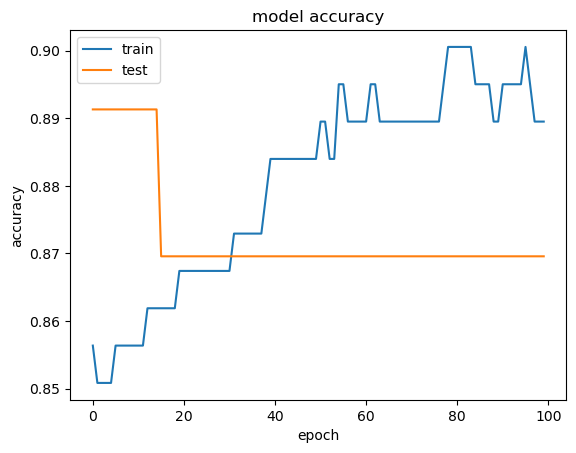

In [17]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


In [54]:
y_pred_1 = model.predict(x_test)
y_pred = (y_pred_1 > 0.5)



3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step


In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

acc = 100*accuracy_score(y_test,y_pred)
print('percentage Accuracy : ',acc)

NameError: name 'y_test' is not defined

In [59]:
#extracting features 

In [60]:
ann_feature_model = Model(inputs=model.inputs, outputs = model.layers[-3].output)
ann_feature_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │              56 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92 (368.00 B)

 Trainable params: 92 (368.00 B)

 Non-trainable params: 0 (0.00 B)

In [61]:
ann_feature_model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])


In [62]:
ann_features = ann_feature_model.predict(x_train,verbose=True)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [63]:
ann_features.shape

(227, 8)

In [64]:
x_train.shape,x_test.shape

((227, 5), (76, 5))

In [65]:
from keras.models import load_model
ann_feature_model.save('ann_feature_model.h5')



In [12]:
model.save("ANN_main.h5")

In [66]:
loaded = load_model('ann_feature_model.h5')

In [68]:
loaded.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │              56 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94 (380.00 B)

 Trainable params: 92 (368.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### Dimensionality Reduction